In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cmocean
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from copy import copy

In [3]:
datadir = '/scratch/rfischer/Kooi_data/data_output/'#'/data/oceanparcels/output_data/data_Reint/'#
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch',
           'SO': 'Southern Ocean',
           'NPSG': 'North Pacific Subtropical Gyre'}

In [4]:
region = 'EqPac'
mortality = 0.39              # [d-1]
runtime = 397                  # [days]
dt = 60                       # [seconds]
outputdt = 12                  # [hours]
death = 'NEMO_detritus'
grazing = 'full'
mixing = 'markov_0_KPP_ceiling'+death+'_tidal' #['markov_0_KPP_reflect'+death+'_tidal',
diss = 0.006
rho_p = 920
rho_bf = 1388
rho_fr= 1800
sizebinedges = [1e-3, 1e-4, 1e-5]
mu1 = [0.02,0.2,0.002]
res = '1x1'
proc = 'bfnoadv'
time = 'SON'
year = '2003'

In [5]:
ds_0 = xr.open_dataset(datadir+'regional_'+region+'_'+proc+'_'+time+'_'+year+'_'+res+'res_'+mixing+'mixing_'+grazing+'_grazing_'+str(diss)[2:]+'diss_'+str(rho_bf)+'rhobf_'+str(rho_fr)+'rhofr_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')#'/data/oceanparcels/output_data/data_Reint/'+'regional_SO_bfnoadv_Jan_2004_1x1res_markov_0_KPP_reflectNEMO_detritus_tidalmixing_full_grazing_006diss_1388rhobf_2200rhofr_10days_60dtsecs_60hrsoutdt.nc')
ds_1 = xr.open_dataset(datadir+'regional_'+region+'_'+proc+'_'+time+'_'+year+'_'+res+'res_'+mixing+'mixing_'+grazing+'_grazing_'+str(diss)[2:]+'diss_'+str(rho_bf)+'rhobf_'+str(rho_fr)+'rhofr_02mu1_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')#'/data/oceanparcels/output_data/data_Reint/'+'regional_SO_bfnoadv_Jan_2004_1x1res_markov_0_KPP_reflectNEMO_detritus_tidalmixing_full_grazing_006diss_1388rhobf_2200rhofr_10days_60dtsecs_60hrsoutdt.nc')
ds_2 = xr.open_dataset(datadir+'regional_'+region+'_'+proc+'_'+time+'_'+year+'_'+res+'res_'+mixing+'mixing_'+grazing+'_grazing_'+str(diss)[2:]+'diss_'+str(rho_bf)+'rhobf_'+str(rho_fr)+'rhofr_0002mu1_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')#'/data/oceanparcels/output_data/data_Reint/'+'regional_SO_bfnoadv_Jan_2004_1x1res_markov_0_KPP_reflectNEMO_detritus_tidalmixing_full_grazing_006diss_1388rhobf_2200rhofr_10days_60dtsecs_60hrsoutdt.nc')
# ds_1 = xr.open_dataset(datadir+'regional_'+region+'_'+proc+'_Jan_2004_'+res+'res_'+mixing[1]+'mixing_'+grazing[1]+'_grazing_'+str(diss)[2:]+'diss_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
# ds_2 = xr.open_dataset(datadir+'regional_'+region+'_'+proc+'_Jan_2004_'+res+'res_'+mixing[2]+'mixing_'+grazing[2]+'_grazing_'+str(diss)[2:]+'diss_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
# ds_3 = xr.open_dataset(datadir+'regional_'+region+'_'+proc+'_Jan_2004_'+res+'res_'+mixing[3]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

FileNotFoundError: [Errno 2] No such file or directory: b'/scratch/rfischer/Kooi_data/data_output/regional_EqPac_bfnoadv_SON_2003_1x1res_markov_0_KPP_ceilingNEMO_detritus_tidalmixing_full_grazing_006diss_1388rhobf_1800rhofr_397days_60dtsecs_12hrsoutdt.nc'

In [6]:
dslist = [ds_0, ds_1,ds_2]#, ds_3

In [7]:
split_ds_0 = list(ds_0.groupby_bins('r_pl', sizebinedges[::-1]))
split_ds_1 = list(ds_1.groupby_bins('r_pl', sizebinedges[::-1]))
split_ds_2 = list(ds_2.groupby_bins('r_pl', sizebinedges[::-1]))
# split_ds_3 = list(ds_3.groupby_bins('r_pl', sizebinedges[::-1]))

In [8]:
split_dslist = [split_ds_0, split_ds_1, split_ds_2]

In [9]:
# mort_cmap = copy(plt.get_cmap('RdPu'))
mort_cmap = ['#FF7917','#14FF37', '#732FFF']
mixing_cmap = ['firebrick','seagreen','purple']
w_vel_cmap = ['salmon', 'lime', 'cornflowerblue', 'gold']
r_pl_clist = ['#7a0177','#c51b8a','#f768a1', '#fbb4b9']
r_pl_cmap = plt.get_cmap('RdPu_r')
region_cmap = ['teal', 'darkorange', '#9AE19D']

In [10]:
number_of_trajectories_to_plot = 330
n_plt = number_of_trajectories_to_plot
f_plt = int(np.round(len(ds_0['traj'])/n_plt))
print('plotting '+str(n_plt)+' of '+str(len(ds_0['traj']))+' trajectories')
print('plotting every '+str(f_plt)+' particles')

plotting 330 of 10000 trajectories
plotting every 30 particles


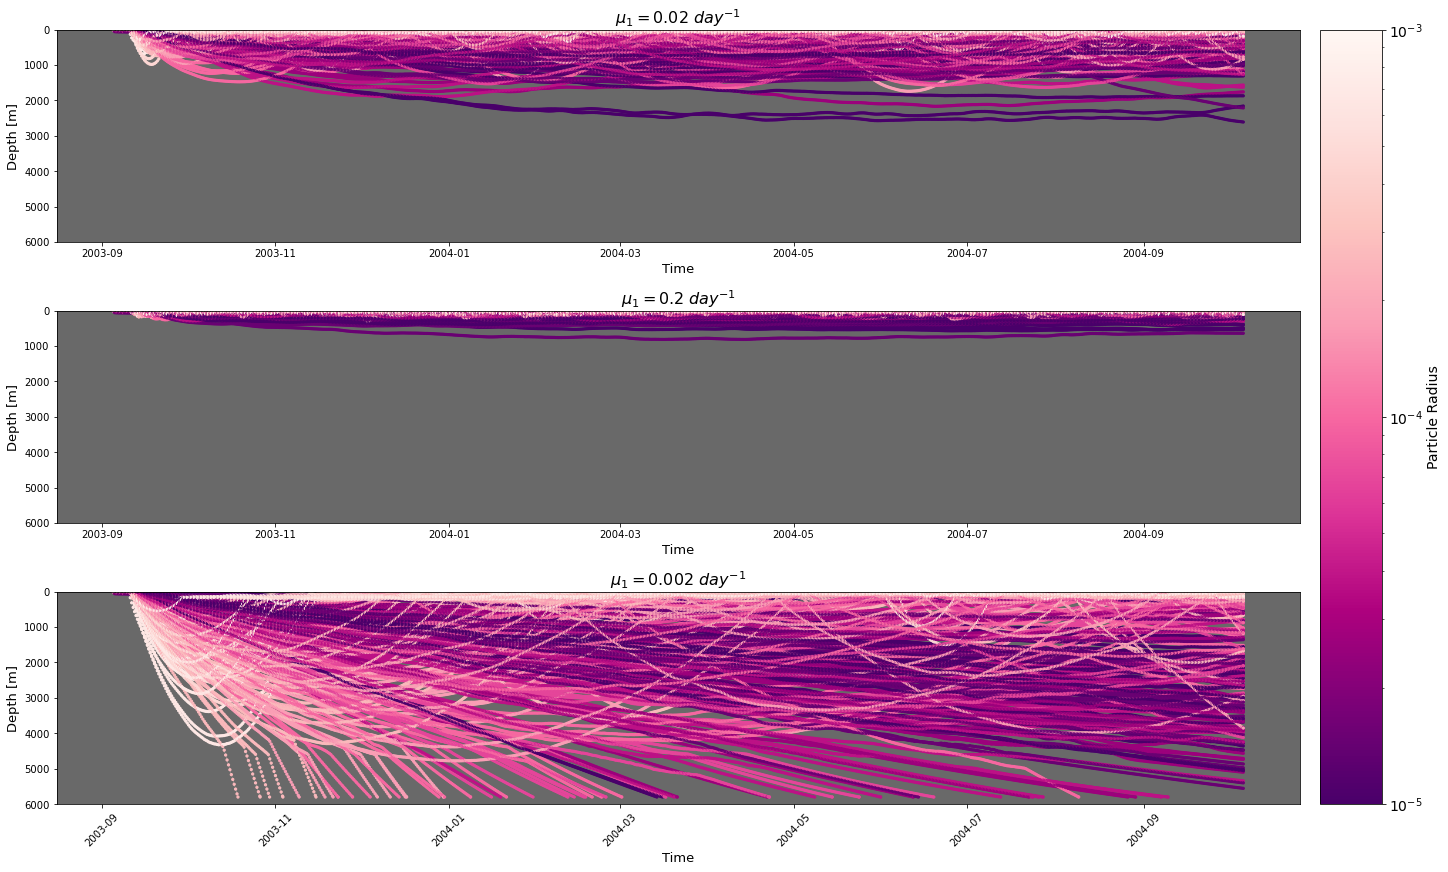

In [12]:
fig = plt.figure(figsize=(20,12),constrained_layout=True)
gs = gridspec.GridSpec(ncols=2, nrows=3, width_ratios=[1,0.05],figure=fig)
ax1 = fig.add_subplot(gs[0, :1])
ax2 = fig.add_subplot(gs[1, :1])
ax3 = fig.add_subplot(gs[2, :1])
ax4 = fig.add_subplot(gs[:, 1])


sc = ax1.scatter(ds_0['time'].T[:,::f_plt], ds_0['z'].T[:,::f_plt], s=5, c=np.tile(ds_0['r_pl'].T[::f_plt],[len(ds_0['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_0['r_pl'].min(), vmax=ds_0['r_pl'].max()),zorder=2)
ln = ax1.plot(ds_0['time'].T[:,::f_plt], ds_0['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
ax1.set_title('$\mu_1 = 0.02~day^{-1}$', fontsize=16)
ax1.set_ylabel('Depth [m]', fontsize=13)
ax1.set_xlabel('Time', fontsize=13)
# ax1.tick_params(axis='x', rotation=45)
ax1.set_facecolor('dimgray')
ax1.set_ylim(6000,0)
# ax1.invert_yaxis()

sc = ax2.scatter(ds_1['time'].T[:,::f_plt], ds_1['z'].T[:,::f_plt], s=5, c=np.tile(ds_1['r_pl'].T[::f_plt],[len(ds_1['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_1['r_pl'].min(), vmax=ds_1['r_pl'].max()),zorder=2)
ln = ax2.plot(ds_1['time'].T[:,::f_plt], ds_1['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
ax2.set_title('$\mu_1 = 0.2~day^{-1}$', fontsize=16)
ax2.set_ylabel('Depth [m]', fontsize=13)
ax2.set_xlabel('Time', fontsize=13)
# ax2.tick_params(axis='x', rotation=45)
ax2.set_facecolor('dimgray')
ax2.set_ylim(6000,0)
# ax2.invert_yaxis()

sc = ax3.scatter(ds_2['time'].T[:,::f_plt], ds_2['z'].T[:,::f_plt], s=5, c=np.tile(ds_2['r_pl'].T[::f_plt],[len(ds_2['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_2['r_pl'].min(), vmax=ds_2['r_pl'].max()),zorder=2)
ln = ax3.plot(ds_2['time'].T[:,::f_plt], ds_2['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
ax3.set_title('$\mu_1 = 0.002~day^{-1}$', fontsize=16)
ax3.set_ylabel('Depth [m]', fontsize=13)
ax3.set_xlabel('Time', fontsize=13)
ax3.tick_params(axis='x', rotation=45)
ax3.set_facecolor('dimgray')
ax3.set_ylim(6000,0)

# sc = ax4.scatter(ds_3['time'].T[:,::f_plt], ds_3['z'].T[:,::f_plt], s=5, c=np.tile(ds_3['r_pl'].T[::f_plt],[len(ds_3['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_3['r_pl'].min(), vmax=ds_3['r_pl'].max()),zorder=2)
# ln = ax4.plot(ds_3['time'].T[:,::f_plt], ds_3['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
# ax4.set_title(death[3])
# ax4.set_ylabel('Depth [m]')
# ax4.set_xlabel('Time')
# ax4.set_facecolor('dimgray')
# # ax3.set_ylim(150,0)
# ax4.invert_yaxis()

cb = fig.colorbar(sc, cax=ax4)
cb.set_label('Particle Radius', fontsize=14)
cb.ax.tick_params(labelsize=14)
plt.show()

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


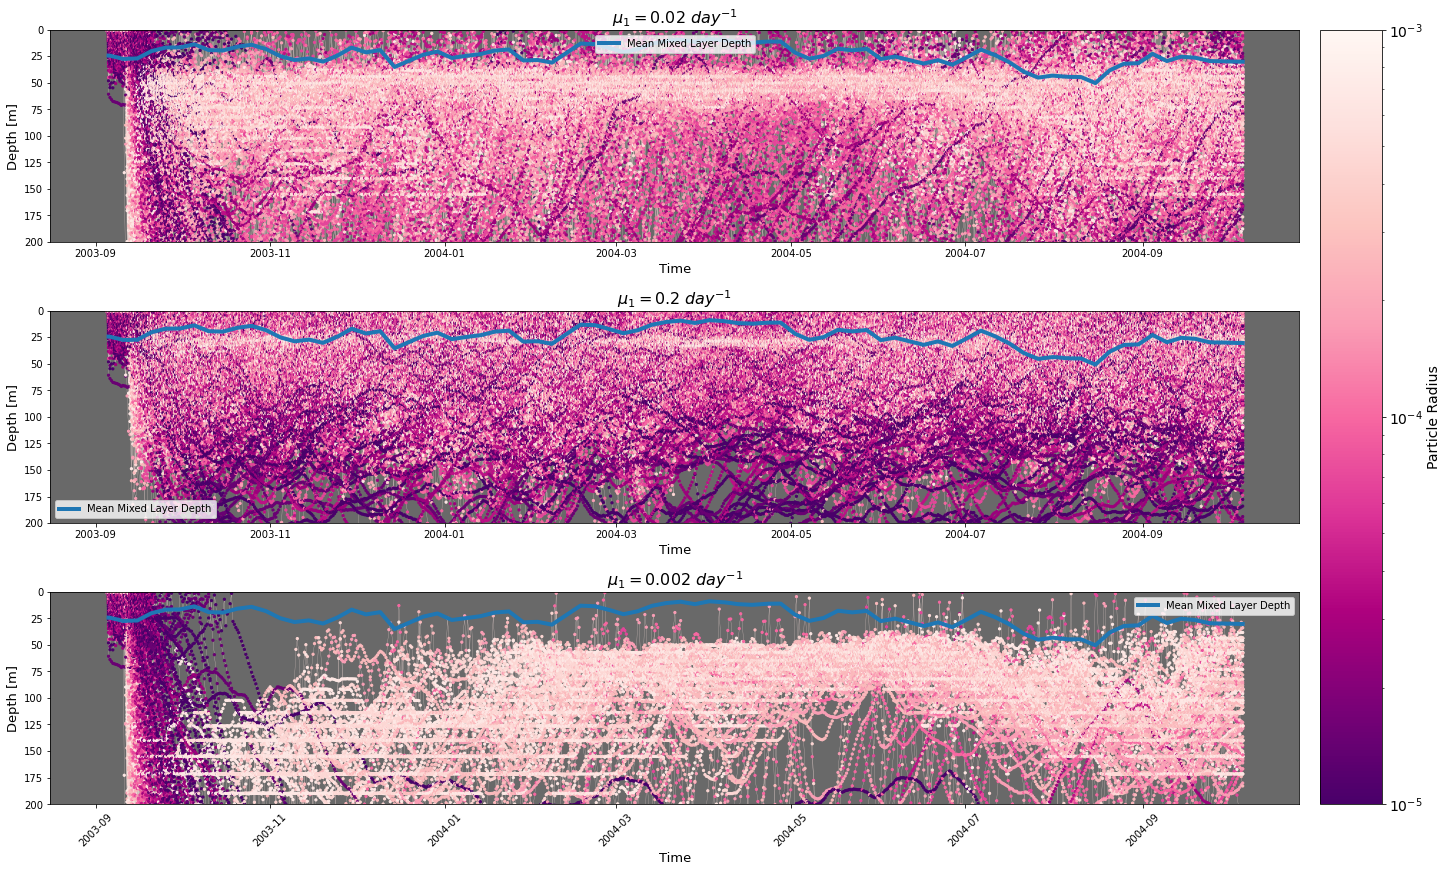

In [21]:
mld0 = np.mean(np.divide(ds_0['z'],ds_0['mld']),axis=0)
mld1 = np.mean(np.divide(ds_1['z'],ds_1['mld']),axis=0)
mld2 = np.mean(np.divide(ds_2['z'],ds_2['mld']),axis=0)

fig = plt.figure(figsize=(20,12),constrained_layout=True)
gs = gridspec.GridSpec(ncols=2, nrows=3, width_ratios=[1,0.05],figure=fig)
ax1 = fig.add_subplot(gs[0, :1])
ax2 = fig.add_subplot(gs[1, :1])
ax3 = fig.add_subplot(gs[2, :1])
ax4 = fig.add_subplot(gs[:, 1])


sc = ax1.scatter(ds_0['time'].T[:,::f_plt], ds_0['z'].T[:,::f_plt], s=5, c=np.tile(ds_0['r_pl'].T[::f_plt],[len(ds_0['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_0['r_pl'].min(), vmax=ds_0['r_pl'].max()),zorder=2)
ln = ax1.plot(ds_0['time'].T[:,::f_plt], ds_0['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
ax1.plot(ds_0['time'][0,:], mld0, linewidth=4, label='Mean Mixed Layer Depth')
ax1.set_title('$\mu_1 = 0.02~day^{-1}$', fontsize=16)
ax1.set_ylabel('Depth [m]', fontsize=13)
ax1.set_xlabel('Time', fontsize=13)
# ax1.tick_params(axis='x', rotation=45)
ax1.set_facecolor('dimgray')
ax1.set_ylim(200,0)
ax1.legend()
# ax1.invert_yaxis()

sc = ax2.scatter(ds_1['time'].T[:,::f_plt], ds_1['z'].T[:,::f_plt], s=5, c=np.tile(ds_1['r_pl'].T[::f_plt],[len(ds_1['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_1['r_pl'].min(), vmax=ds_1['r_pl'].max()),zorder=2)
ln = ax2.plot(ds_1['time'].T[:,::f_plt], ds_1['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
ax2.plot(ds_1['time'][0,:], mld1, linewidth=4, label='Mean Mixed Layer Depth')
ax2.set_title('$\mu_1 = 0.2~day^{-1}$', fontsize=16)
ax2.set_ylabel('Depth [m]', fontsize=13)
ax2.set_xlabel('Time', fontsize=13)
# ax2.tick_params(axis='x', rotation=45)
ax2.set_facecolor('dimgray')
ax2.set_ylim(200,0)
ax2.legend()
# ax2.invert_yaxis()

sc = ax3.scatter(ds_2['time'].T[:,::f_plt], ds_2['z'].T[:,::f_plt], s=5, c=np.tile(ds_2['r_pl'].T[::f_plt],[len(ds_2['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_2['r_pl'].min(), vmax=ds_2['r_pl'].max()),zorder=2)
ln = ax3.plot(ds_2['time'].T[:,::f_plt], ds_2['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
ax3.plot(ds_2['time'][0,:], mld2, linewidth=4, label='Mean Mixed Layer Depth')
ax3.set_title('$\mu_1 = 0.002~day^{-1}$', fontsize=16)
ax3.set_ylabel('Depth [m]', fontsize=13)
ax3.set_xlabel('Time', fontsize=13)
ax3.tick_params(axis='x', rotation=45)
ax3.set_facecolor('dimgray')
ax3.set_ylim(200,0)
ax3.legend()
# ax3.invert_yaxis()

# sc = ax4.scatter(ds_3['time'].T[:,::f_plt], ds_3['z'].T[:,::f_plt], s=5, c=np.tile(ds_3['r_pl'].T[::f_plt],[len(ds_3['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_3['r_pl'].min(), vmax=ds_3['r_pl'].max()),zorder=2)
# ln = ax4.plot(ds_3['time'].T[:,::f_plt], ds_3['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
# ax4.set_title(death[3])
# ax4.set_ylabel('Depth [m]')
# ax4.set_xlabel('Time')
# ax4.tick_params(axis='x', rotation=45)
# ax4.set_facecolor('dimgray')
# # ax3.set_ylim(150,0)
# ax4.invert_yaxis()

cb = fig.colorbar(sc, cax=ax4)
cb.set_label('Particle Radius', fontsize=14)
cb.ax.tick_params(labelsize=14)

plt.show()

In [27]:
depthbins = np.linspace(0,500,100)
starttimes=(ds_0['time'][0,:]-np.timedelta64(int(outputdt/2.), 'h')).values
endtime = (ds_0['time'][0,-1]+np.timedelta64(int(outputdt/2.), 'h')).values
timebins = np.append(starttimes,endtime)

In [32]:
depth_densities = np.zeros((len(dslist),len(split_ds_0),len(dslist[0]['obs']),len(depthbins)-1))

for k in range(len(dslist)):
    split_ds = list(dslist[k].groupby_bins('r_pl',sizebinedges[::-1]))
    for i in range(len(depth_densities[0])):
        for j in range(len(dslist[k]['obs'])):
            values, bins = np.histogram(split_ds[i][1]['z'].isel(obs=j), depthbins)
            depth_densities[k,i,j] = values/np.diff(depthbins)

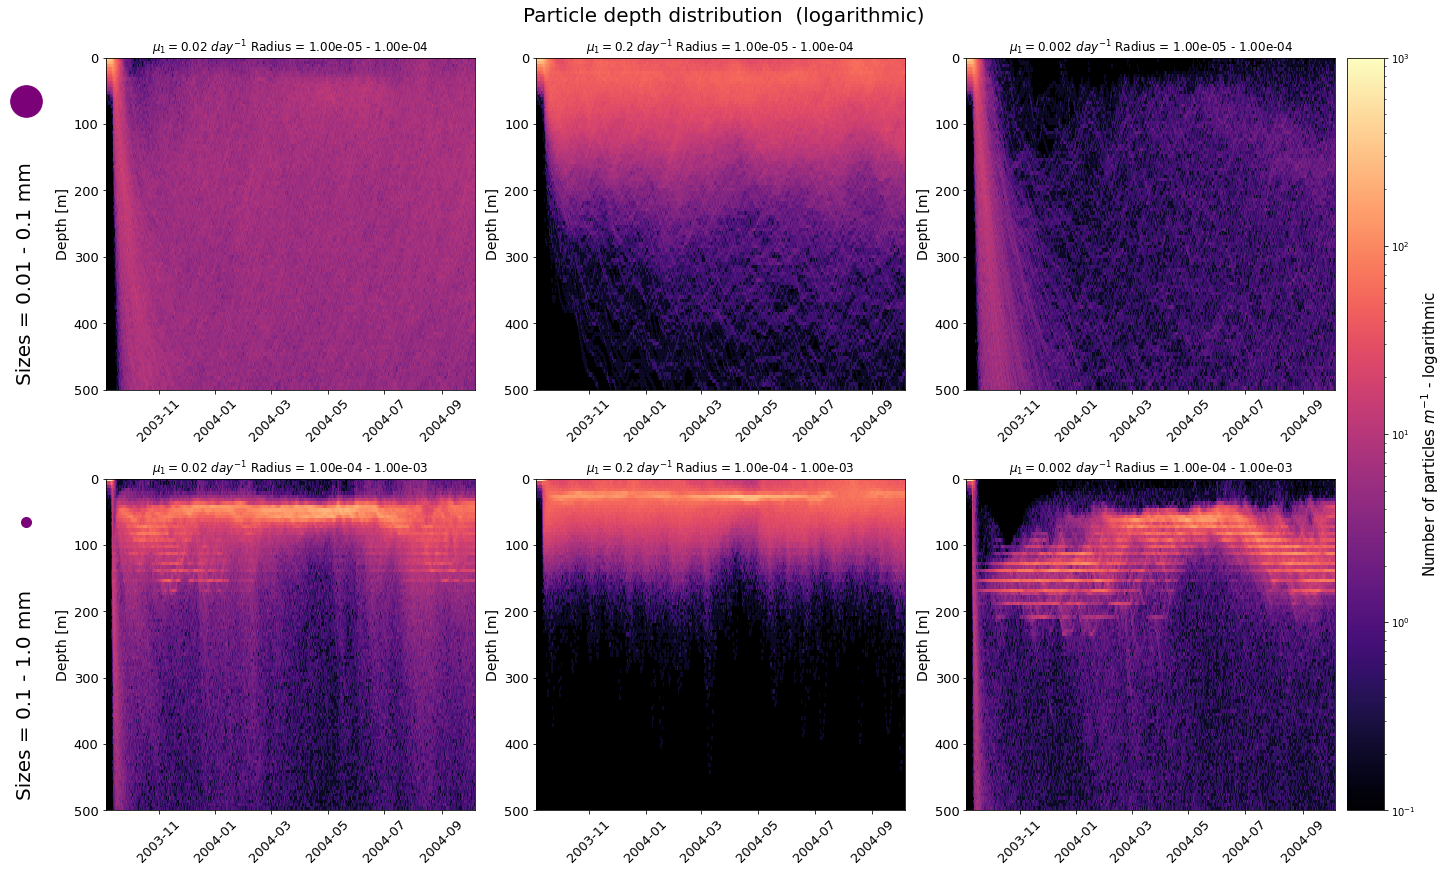

In [35]:
fig = plt.figure(figsize=(20,12),constrained_layout=True)
gs = gridspec.GridSpec(ncols=5, nrows=2, width_ratios=[0.1,1,1,1,0.1], figure=fig)

ax00 = fig.add_subplot(gs[0, 0])
ax01 = fig.add_subplot(gs[1, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 2])
ax5 = fig.add_subplot(gs[0, 3])
ax6 = fig.add_subplot(gs[1, 3])
ax7 = fig.add_subplot(gs[:, 4])
axes = [[ax00,ax01],[ax1, ax2],[ax3,ax4],[ax5,ax6]]

for i, ax_r in enumerate(axes[1:]):
    for c, ax in enumerate(ax_r):
        ax.set_facecolor('k')
        pc = ax.pcolormesh(timebins,depthbins,depth_densities[i,c].T, cmap='magma',norm=colors.LogNorm(vmin=1e-1, vmax=1e3))
        #ax.set_title(mixing[0]+' mixing', fontsize=14)
        ax.set_ylabel('Depth [m]', fontsize=14)
        ax.tick_params(axis='both', labelsize=13)
        ax.tick_params(axis='x', rotation=45)
        ax.set_ylim(500,0)
#         ax.invert_yaxis()
        #cb.set_label('Fraction of particles - logarithmic', size=15)
        ax.set_title('$\mu_1 = '+str(mu1[i])+'~day^{-1}$'+' Radius = '+"{left:.2e} - {right:.2e}".format(left=split_ds[c][0].left, right=split_ds[c][0].right))
        
cb = fig.colorbar(pc, cax=ax7)
cb.set_label('Number of particles $m^{-1}$ - logarithmic', size=15)
fig.suptitle('Particle depth distribution  (logarithmic)', fontsize=20)

for k, ds_r in enumerate(split_ds):
    axes[0][k].scatter(0.5,0.87,s=sizebinedges[k]*1000000,color=r_pl_clist[0])
    axes[0][k].set_ylim(0,1)
    axes[0][k].text(0.5,0.35,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=90, fontsize=20, horizontalalignment='center',verticalalignment='center')
    axes[0][k].axis('off')

In [44]:
Q=2
T=1
R=0.1

In [45]:
Q**((T-20)/10)*R

0.02679433656340733

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(14,10), constrained_layout=True)
fig.suptitle('Numbers of diatoms in biofilm', fontsize=22)

ax1.plot(ds_0['time'].T[1:,::f_plt], ds_0['a_dead'].T[1:,::f_plt], marker='o', markersize=3,c='gold', alpha = 0.7, label='dead')
ax1.plot(ds_0['time'].T[1:,::f_plt], ds_0['a'].T[1:,::f_plt], marker='o', markersize=3,c='limegreen', alpha = 0.7, label='alive')
ax1.set_facecolor('dimgray')
ax1.grid(b=True, axis='y')
ax1.set_title(death[0], fontsize=16)
ax1.set_ylabel('Number of cells')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(-1e11,1e12)

ax2.plot(ds_1['time'].T[1:,::f_plt], ds_1['a_dead'].T[1:,::f_plt], marker='o', markersize=3,c='gold', alpha = 0.7, label='dead')
ax2.plot(ds_1['time'].T[1:,::f_plt], ds_1['a'].T[1:,::f_plt], marker='o', markersize=3,c='limegreen', alpha = 0.7, label='alive')
ax2.set_facecolor('dimgray')
ax2.grid(b=True, axis='y')
ax2.set_title(death[1], fontsize=16)
ax2.set_ylabel('Number of cells')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(-1e11,1e12)

# ax3.plot(ds_2['time'].T[1:,::f_plt], ds_2['a'].T[1:,::f_plt], marker='o', markersize=3,c='limegreen', alpha = 0.7, label='alive')
# ax3.plot(ds_2['time'].T[1:,::f_plt], ds_2['a_dead'].T[1:,::f_plt], marker='o', markersize=3,c='gold', alpha = 0.7, label='dead')
# ax3.set_facecolor('dimgray')
# ax3.grid(b=True, axis='y')
# ax3.set_title(death[2], fontsize=16)
# ax3.set_ylabel('Number of cells')
# ax3.set_xlabel('Time')
# ax3.tick_params(axis='x', rotation=45)
# ax3.set_ylim(-1e11,5e11)

custom_lines = [Line2D([0], [0], color='limegreen', lw=4),
                Line2D([0], [0], color='gold', lw=4)]

ax2.legend(custom_lines, ["alive", "dead"], bbox_to_anchor=(0.1, 0.99), loc='upper right')
plt.show()

In [ ]:
fig = plt.figure(figsize=(16,12),constrained_layout=True)
gs = gridspec.GridSpec(ncols=3, nrows=2, width_ratios=[1,1,0.1],figure=fig)
ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[1, :2])
ax3 = fig.add_subplot(gs[:, 2])

sc = ax1.scatter(ds_0['time'].T[:,::f_plt], ds_0['z'].T[:,::f_plt], s=5, c=ds_0['a'].T[:,::f_plt],cmap='cmo.algae',norm=colors.LogNorm(vmin= 1e8, vmax=1e12),zorder=2)
ln = ax1.plot(ds_0['time'].T[:,::f_plt], ds_0['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
ax1.plot(ds_0['time'][0,:], mld0, linewidth=4, label='Mean Mixed Layer Depth')
ax1.set_title('Sinking trajectories with wind mixing and '+death[0]+' biofilm dynamics', fontsize=16)
ax1.set_ylabel('Depth [m]', fontsize=13)
ax1.set_xlabel('Time', fontsize=13)
ax1.set_facecolor('dimgray')
ax1.set_ylim(700,0)
ax1.legend(loc = 'lower left')

sc = ax2.scatter(ds_1['time'].T[:,::f_plt], ds_1['z'].T[:,::f_plt], s=5, c=ds_1['a'].T[:,::f_plt],cmap='cmo.algae',norm=colors.LogNorm(vmin= 1e8, vmax=1e12),zorder=2)
ln = ax2.plot(ds_1['time'].T[:,::f_plt], ds_1['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
ax2.plot(ds_1['time'][0,:], mld1, linewidth=4, label='Mean Mixed Layer Depth')
ax2.set_title('Sinking trajectories with wind mixing and '+death[1]+' biofilm dynamics', fontsize=16)
ax2.set_ylabel('Depth [m]', fontsize=13)
ax2.set_xlabel('Time', fontsize=13)
ax2.set_facecolor('dimgray')
ax2.set_ylim(700,0)
ax2.legend(loc = 'lower left')

cb = fig.colorbar(sc, cax=ax3, extend='min')
cb.set_label('Living algae in biofilm [no. m-2]', fontsize=14)
cb.ax.tick_params(labelsize=14)
plt.show()

In [ ]:
fig = plt.figure(figsize=(16,12),constrained_layout=True)
gs = gridspec.GridSpec(ncols=3, nrows=2, width_ratios=[1,1,0.1],figure=fig)
ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[1, :2])
ax3 = fig.add_subplot(gs[:, 2])

sc = ax1.scatter(ds_0['time'].T[:,::f_plt], ds_0['z'].T[:,::f_plt], s=5, c=ds_0['a_dead'].T[:,::f_plt],cmap='cmo.matter',norm=colors.LogNorm(vmin= 1e8, vmax=1e12),zorder=2)
ln = ax1.plot(ds_0['time'].T[:,::f_plt], ds_0['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
ax1.plot(ds_0['time'][0,:], mld0, linewidth=4, label='Mean Mixed Layer Depth')
ax1.set_title('Sinking trajectories with wind mixing and '+death[0]+' biofilm dynamics', fontsize=16)
ax1.set_ylabel('Depth [m]', fontsize=13)
ax1.set_xlabel('Time', fontsize=13)
ax1.set_facecolor('dimgray')
ax1.set_ylim(700,0)
ax1.legend(loc = 'lower left')

sc = ax2.scatter(ds_1['time'].T[:,::f_plt], ds_1['z'].T[:,::f_plt], s=5, c=ds_1['a_dead'].T[:,::f_plt],cmap='cmo.matter',norm=colors.LogNorm(vmin= 1e8, vmax=1e12),zorder=2)
ln = ax2.plot(ds_1['time'].T[:,::f_plt], ds_1['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
ax2.plot(ds_1['time'][0,:], mld1, linewidth=4, label='Mean Mixed Layer Depth')
ax2.set_title('Sinking trajectories with wind mixing and '+death[1]+' biofilm dynamics', fontsize=16)
ax2.set_ylabel('Depth [m]', fontsize=13)
ax2.set_xlabel('Time', fontsize=13)
ax2.set_facecolor('dimgray')
ax2.set_ylim(700,0)
ax2.legend(loc = 'lower left')

cb = fig.colorbar(sc, cax=ax3, extend='min')
cb.set_label('Living algae in biofilm [no. m-2]', fontsize=14)
cb.ax.tick_params(labelsize=14)
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(14,10), constrained_layout=True)
fig.suptitle('Dead diatoms mass balance', fontsize=22)

ax1.plot(ds_0['time'].T[1:,::f_plt], ds_0['a_direct'].T[1:,::f_plt], marker='o', markersize=3,c='turquoise', alpha = 0.4, label='non-linear')
ax1.plot(ds_0['time'].T[1:,::f_plt], ds_0['a_indirect'].T[1:,::f_plt], marker='o', markersize=3,c='firebrick', alpha = 0.4, label='grazing')
ax1.plot(ds_0['time'].T[1:,::f_plt], -ds_0['a_diss'].T[1:,::f_plt], marker='o', markersize=3,c='gold', alpha = 0.4, label='dissolution')
ax1.set_facecolor('dimgray')
ax1.grid(b=True, axis='y')
ax1.set_title(death[0], fontsize=16)
ax1.set_ylabel('Number of cells')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(-1e5,1.5e6)

ax2.plot(ds_1['time'].T[1:,::f_plt], ds_1['a_direct'].T[1:,::f_plt], marker='o', markersize=3,c='turquoise', alpha = 0.4, label='non-linear')
ax2.plot(ds_1['time'].T[1:,::f_plt], ds_1['a_indirect'].T[1:,::f_plt], marker='o', markersize=3,c='firebrick', alpha = 0.4, label='grazing')
ax2.plot(ds_1['time'].T[1:,::f_plt], -ds_1['a_diss'].T[1:,::f_plt], marker='o', markersize=3,c='gold', alpha = 0.4, label='dissolution')
ax2.set_facecolor('dimgray')
ax2.grid(b=True, axis='y')
ax2.set_title(death[1], fontsize=16)
ax2.set_ylabel('Number of cells')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(-1e5,1.5e6)

# ax3.plot(ds_2['time'].T[1:,::f_plt], ds_2['a_direct'].T[1:,::f_plt], marker='o', markersize=3,c='turquoise', alpha = 0.4, label='non-linear')
# ax3.plot(ds_2['time'].T[1:,::f_plt], ds_2['a_indirect'].T[1:,::f_plt], marker='o', markersize=3,c='firebrick', alpha = 0.4, label='grazing')
# ax3.plot(ds_2['time'].T[1:,::f_plt], -ds_2['a_diss'].T[1:,::f_plt], marker='o', markersize=3,c='gold', alpha = 0.4, label='dissolution')
# ax3.set_facecolor('dimgray')
# ax3.grid(b=True, axis='y')
# ax3.set_title(death[2], fontsize=16)
# ax3.set_ylabel('Number of cells')
# ax3.set_xlabel('Time')
# ax3.tick_params(axis='x', rotation=45)
# ax3.set_ylim(-1e5,1.5e6)

custom_lines = [Line2D([0], [0], color='turquoise', lw=4),
                Line2D([0], [0], color='firebrick', lw=4),
                Line2D([0], [0], color='gold', lw=4)]

ax1.legend(custom_lines, ["non-linear", "grazing", "dissolution"], bbox_to_anchor=(0.15, 0.99), loc='upper right')
ax2.legend(custom_lines, ["non-linear", "grazing", "dissolution"], bbox_to_anchor=(0.15, 0.99), loc='upper right')
# ax3.legend(custom_lines, ["non-linear", "grazing", "dissolution"], bbox_to_anchor=(0.15, 0.99), loc='upper right')
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(14,10), constrained_layout=True)
fig.suptitle('Living diatoms mass balance', fontsize=22)

ax1.plot(ds_0['time'].T[1:,::f_plt], ds_0['a_growth'].T[1:,::f_plt], marker='o', markersize=3,c='lightcyan', alpha = 0.4)
ax1.plot(ds_0['time'].T[1:,::f_plt], -ds_0['a_nl'].T[1:,::f_plt], marker='o', markersize=3,c='mediumseagreen', alpha = 0.4)
ax1.plot(ds_0['time'].T[1:,::f_plt], -ds_0['a_l'].T[1:,::f_plt], marker='o', markersize=3,c='yellow', alpha = 0.4)
ax1.plot(ds_0['time'].T[1:,::f_plt], ds_0['a_coll'].T[1:,::f_plt], marker='o', markersize=3,c='orangered', alpha = 0.4)
ax1.plot(ds_0['time'].T[1:,::f_plt], -ds_0['a_gr'].T[1:,::f_plt], marker='o', markersize=3,c='darkmagenta', alpha = 0.4)
ax1.set_facecolor('dimgray')
ax1.grid(b=True, axis='y')
ax1.set_title(death[0], fontsize=16)
ax1.set_ylabel('Number of cells')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(-3e5,3e5)

ax2.plot(ds_1['time'].T[1:,::f_plt], ds_1['a_growth'].T[1:,::f_plt], marker='o', markersize=3,c='lightcyan', alpha = 0.4)
ax2.plot(ds_1['time'].T[1:,::f_plt], -ds_1['a_nl'].T[1:,::f_plt], marker='o', markersize=3,c='mediumseagreen', alpha = 0.4)
ax2.plot(ds_1['time'].T[1:,::f_plt], -ds_1['a_l'].T[1:,::f_plt], marker='o', markersize=3,c='yellow', alpha = 0.4)
ax2.plot(ds_1['time'].T[1:,::f_plt], ds_1['a_coll'].T[1:,::f_plt], marker='o', markersize=3,c='orangered', alpha = 0.4)
ax2.plot(ds_1['time'].T[1:,::f_plt], -ds_1['a_gr'].T[1:,::f_plt], marker='o', markersize=3,c='darkmagenta', alpha = 0.4)
ax2.set_facecolor('dimgray')
ax2.grid(b=True, axis='y')
ax2.set_title(death[1], fontsize=16)
ax2.set_ylabel('Number of cells')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(-3e5,3e5)

# ax3.plot(ds_2['time'].T[1:,::f_plt], ds_2['a_growth'].T[1:,::f_plt], marker='o', markersize=3,c='lightcyan', alpha = 0.4)
# ax3.plot(ds_2['time'].T[1:,::f_plt], -ds_2['a_nl'].T[1:,::f_plt], marker='o', markersize=3,c='mediumseagreen', alpha = 0.4)
# ax3.plot(ds_2['time'].T[1:,::f_plt], -ds_2['a_l'].T[1:,::f_plt], marker='o', markersize=3,c='yellow', alpha = 0.4)
# ax3.plot(ds_2['time'].T[1:,::f_plt], -ds_2['a_gr'].T[1:,::f_plt], marker='o', markersize=3,c='darkmagenta', alpha = 0.4)
# ax3.plot(ds_2['time'].T[1:,::f_plt], ds_2['a_coll'].T[1:,::f_plt], marker='o', markersize=3,c='orangered', alpha = 0.4)
# ax3.set_facecolor('dimgray')
# ax3.grid(b=True, axis='y')
# ax3.set_title(death[2], fontsize=16)
# ax3.set_ylabel('Number of cells')
# ax3.set_xlabel('Time')
# ax3.tick_params(axis='x', rotation=45)
# ax3.set_ylim(-3e5,3e5)

custom_lines = [Line2D([0], [0], color='orangered', lw=4),
                Line2D([0], [0], color='lightcyan', lw=4),
                Line2D([0], [0], color='darkmagenta', lw=4),
                Line2D([0], [0], color='yellow', lw=4),
                Line2D([0], [0], color='mediumseagreen', lw=4)]

ax1.legend(custom_lines, ["collisions", "growth", "grazing", "linear", "non-linear"], bbox_to_anchor=(0.15, 0.99), loc='upper right')
ax2.legend(custom_lines, ["collisions", "growth", "grazing", "linear", "non-linear"], bbox_to_anchor=(0.15, 0.99), loc='upper right')
# ax3.legend(custom_lines1, ["collisions", "growth", "grazing", "linear", "non-linear"], bbox_to_anchor=(0.15, 0.99), loc='upper right')
plt.show()